# Table of Contents

1. [Import Packages](#1.-Import-Packages)
2. [Load and Inspect Data](#2.-Load-and-Inspect-Data)
3. [Data Preprocessing](#3.-Data-Preprocessing)
    - 3.1. [Missing Values](#Missing-Values)
    - 3.2. [Correlation Matrix](#Correlation-Matrix)
    - 3.3. [SalePrice Correlation Matrix](#SalePrice-Correlation-Matrix)
    - 3.4. [Scatter plots](#Scatter-plots-between-SalePrice-and-correlated-variables)
    - 3.5. [Outliers](#Outliers)
4. [Feature Engineering](#4.-Feature-Engineering)
    - 4.1. [Log Transformation](#Log-Transformation)
    - 4.2. [Transforming some numerical variables](#Transforming-some-numerical-variables-that-are-really-categorical)
    - 4.3. [Create some additional features](#Create-some-additional-features)
    - 4.4. [Label Encoding ordinal variables](#Label-Encoding-ordinal-variables)
    - 4.5. [Get dummy categorical features](#Get-dummy-categorical-features)
4. [Create the Model](#5.-Create-the-Model)

# 1. Import Packages

In [256]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("dark")

import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

# 2. Load and Inspect Data

In [257]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_ID = train['Id']
test_ID = test['Id']
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

all_data = pd.concat((train, test)).reset_index(drop=True)

In [258]:
# To split all_data into separate sets later
ntrain = train.shape[0]

train.shape, test.shape

((1460, 80), (1459, 79))

In [259]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [260]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [261]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


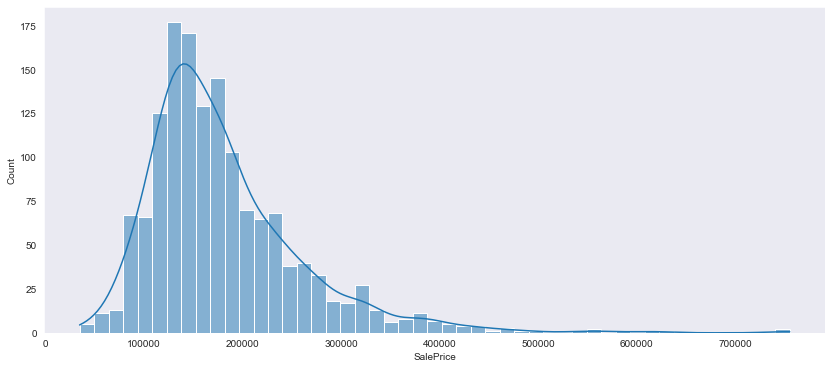

In [262]:
plt.figure(figsize=(14, 6))
sns.histplot(train['SalePrice'], kde=True);

In [263]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# 3. Data Preprocessing

### Missing Values

In [264]:
missing = pd.DataFrame((all_data.isna().sum() / len(all_data) * 100).\
                       sort_values(ascending=False).head(35).reset_index())
missing.columns = ['Features', 'Percent']

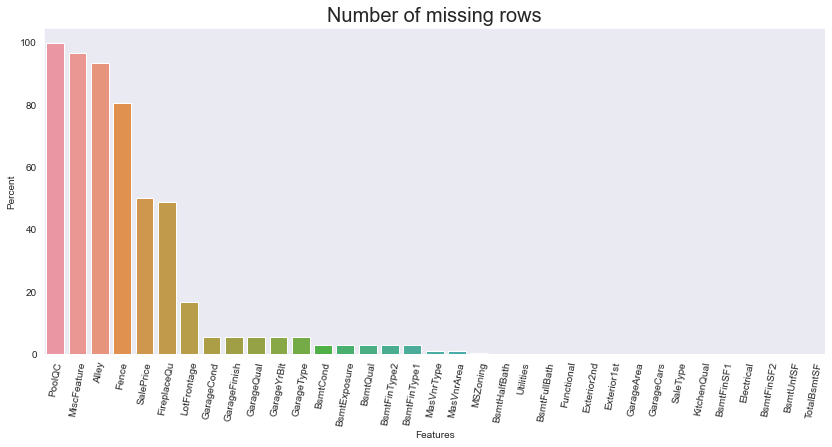

In [265]:
plt.figure(figsize=(14, 6))
plt.title('Number of missing rows', fontsize=20)
sns.barplot(x = "Features", y = 'Percent', data = missing)
plt.xticks(rotation=80)
plt.show()

In [266]:
# Columns where NaN's mean None
none_cols = ['Alley', 'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType',
            'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
            'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']

for col in none_cols:
    all_data[col].fillna("None", inplace=True)

    
# Columns where NaN's mean 0
zero_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
            'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea']

for col in zero_cols:
    all_data[col].fillna(0, inplace=True)

    
# Columns where NaN's will be replaced with most frequent choice
most_frequent_cols = ["Utilities", "Functional", "Electrical",
                     "KitchenQual", "Exterior2nd", "Exterior1st", "SaleType"]

for col in most_frequent_cols:
    all_data[col].fillna(all_data[col].mode()[0], inplace=True)

    
# LotFrontage NaN's will be replaced with median value according to neighborhood
all_data.LotFrontage = all_data.groupby('Neighborhood').LotFrontage.apply(lambda x: x.fillna(x.median()))


# MSZoning's NaN's will be replaced with most common option according to MSSubClass
all_data.MSZoning = all_data.groupby('MSSubClass').MSZoning.apply(lambda x: x.fillna(x.mode()[0]))

### Correlation Matrix

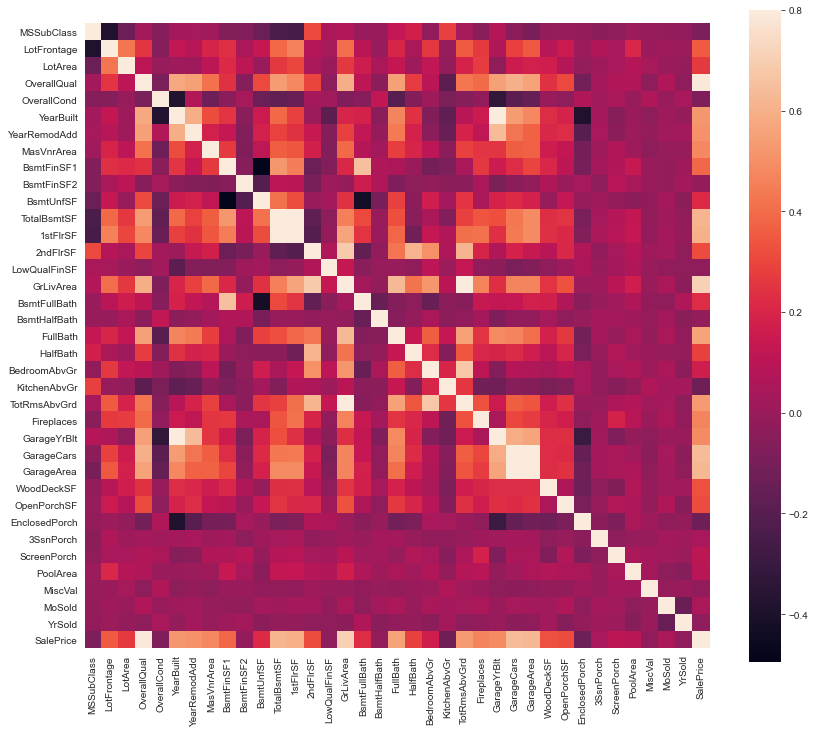

In [267]:
plt.figure(figsize=(14,12))
corrmat = train.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

#### SalePrice Correlation Matrix

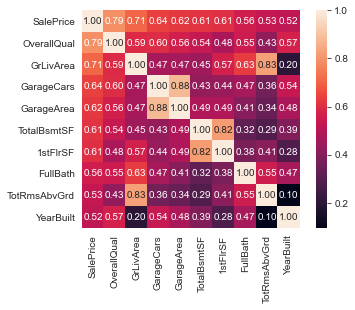

In [268]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

We should remove highly correlated features because they don't improve our models and to avoid performance loss.

**Highly correlated features:**
- GarageCars & GarageArea
- YearBuilt & GarageYrBlt
- GrLivArea & TotRmsAbvGrd
- TotalBsmtSF & 1stFlrSF

Therefore, we only need one from each pair of these variables in our analysis.

**The most correlated variables with SalePrice:**
- OverallQual, GrLivArea, GarageCars, TotalBsmtSF, FullBath & YearBuilt

In [269]:
all_data.drop(['GarageYrBlt', 'TotRmsAbvGrd', 'GarageArea', '1stFlrSF'], axis=1, inplace=True)

### Scatter plots between SalePrice and correlated variables

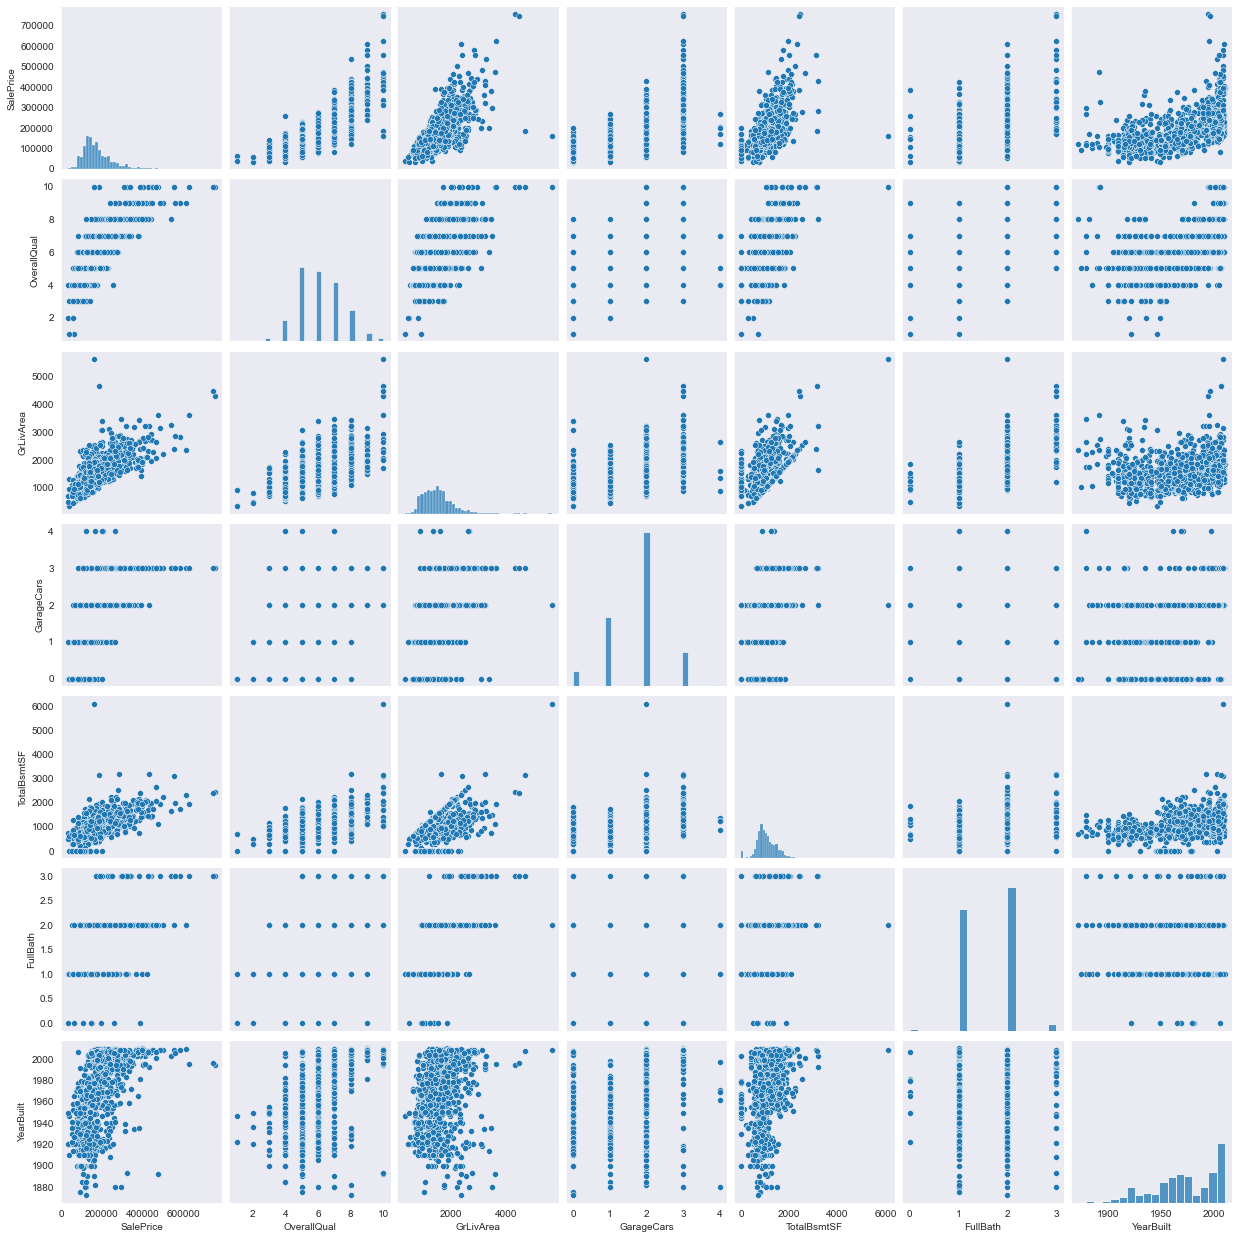

In [270]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols])

### Outliers

Outliers are something that we should be aware of. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

#### GrLivArea

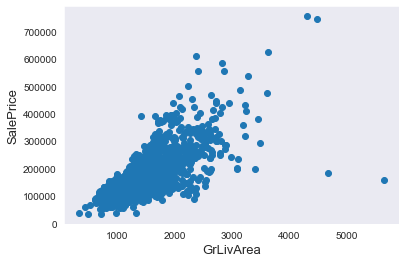

In [271]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

The two values in the bottom right corner seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. These two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

In [272]:
all_data.drop(train[train['GrLivArea'] > 4500].index, inplace=True)

# 4. Feature Engineering

### Log Transformation

#### Target Variable

D:\Applications\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


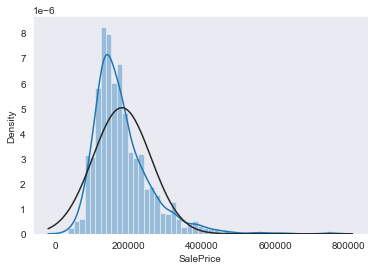

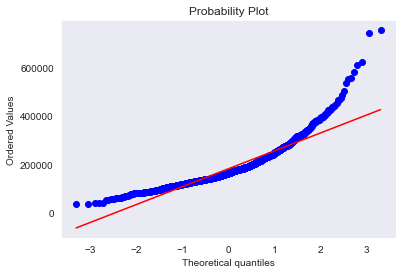

In [273]:
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

The target variable is right skewed. As linear models love normally distributed data, we need to transform this variable and make it more normally distributed.

D:\Applications\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


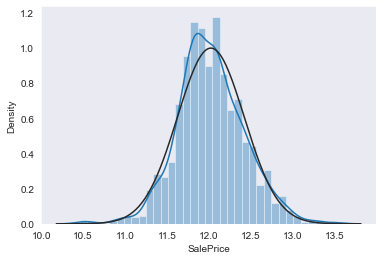

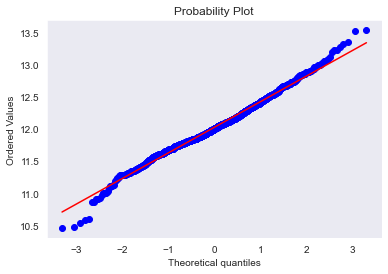

In [274]:
#applying log transformation
train['SalePrice'] = np.log(train['SalePrice'])

#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

all_data['SalePrice'] = train['SalePrice']

#### GrLivArea

D:\Applications\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


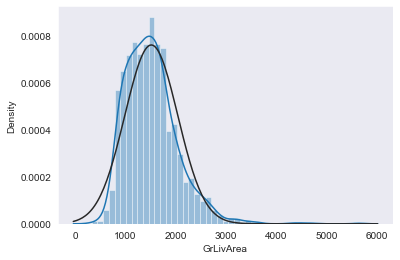

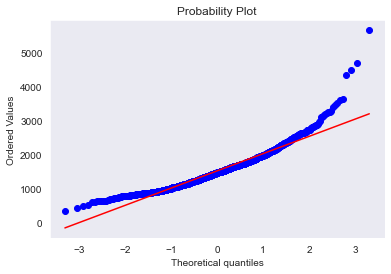

In [275]:
#histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

D:\Applications\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


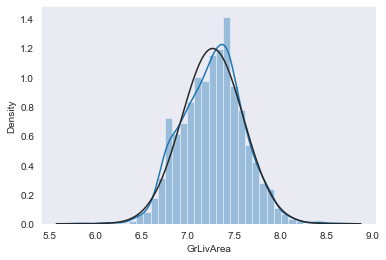

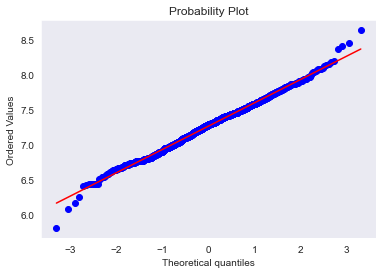

In [276]:
#applying log transformation
train['GrLivArea'] = np.log(train['GrLivArea'])

#histogram and normal probability plot
sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

all_data['GrLivArea'] = train['GrLivArea']

### Transforming some numerical variables that are really categorical

In [277]:
# Some of the non-numeric predictors are stored as numbers. We convert them into strings.
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

### Create some additional features

In [278]:
all_data['TotalLot'] = all_data['LotFrontage'] + all_data['LotArea']
all_data['TotalBsmtFin'] = all_data['BsmtFinSF1'] + all_data['BsmtFinSF2']
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['2ndFlrSF']
all_data['TotalBath'] = all_data['FullBath'] + all_data['HalfBath']
all_data['TotalPorch'] = all_data['OpenPorchSF'] + all_data['EnclosedPorch'] + all_data['ScreenPorch']

### Label Encoding ordinal variables

In [279]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2917, 81)


### Get dummy categorical features

In [280]:
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,10,65.0,8450,1,1,3,0,7,4,2003,...,0,0,0,1,0,0,0,0,1,0
1,5,80.0,9600,1,1,3,0,6,7,1976,...,0,0,0,1,0,0,0,0,1,0
2,10,68.0,11250,1,1,0,0,7,4,2001,...,0,0,0,1,0,0,0,0,1,0
3,11,60.0,9550,1,1,0,0,7,4,1915,...,0,0,0,1,1,0,0,0,0,0
4,10,84.0,14260,1,1,0,0,8,4,2000,...,0,0,0,1,0,0,0,0,1,0


# 5. Create the Model

#### Split into final train and test sets

In [281]:
train = all_data[:ntrain]
test = all_data[ntrain:]

print(train.shape)
print(test.shape)

(1460, 223)
(1457, 223)


In [282]:
X_train = train.drop("SalePrice", axis=1)
Y_train = train["SalePrice"]

#### Submission

In [283]:
output = pd.DataFrame({'Id': test_ID,
                       'SalePrice': prediction})
output.to_csv('submission.csv', index=False)